# Analysis

**Hypothesis**: In severe COVID-19, key immune cell types—specifically monocytes and T cells—exhibit altered metabolic profiles reflected in the balance of mitochondrial gene content (percent_mt) and ribosomal gene expression (percent_rpl and percent_rps). We hypothesize that in severe patients (Status == 1), these cell types will display significantly different distribution patterns and correlations of these metabolic metrics compared with non-severe individuals (Status == 0), pointing to metabolic reprogramming that may uncover novel mechanisms of disease pathology.

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


Loading data...


Data loaded: 44721 cells and 26361 genes


# Analysis Plan

**Hypothesis**: In severe COVID-19, key immune cell types—specifically monocytes and T cells—exhibit altered metabolic profiles reflected in the balance of mitochondrial gene content (percent_mt) and ribosomal gene expression (percent_rpl and percent_rps). We hypothesize that in severe patients (Status == 1), these cell types will display significantly different distribution patterns and correlations of these metabolic metrics compared with non-severe individuals (Status == 0), pointing to metabolic reprogramming that may uncover novel mechanisms of disease pathology.

## Steps:
1. Step 1: Validate data integrity and perform exploratory data analysis (EDA) on mitochondrial and ribosomal gene metrics (percent_mt, percent_rpl, and percent_rps) for monocytes (cell_type_coarse = 0) and T cells (cell_type_coarse = 1). Summarize the distributions and compute group-wise statistics by disease status (Status) after checking that all required metadata columns are present.
2. Step 2: Expand the visualization by creating boxplots and violin plots for percent_mt, percent_rpl, and percent_rps, ensuring a consistent hue ordering (e.g., Status 0 first, then Status 1) and using custom color palettes if desired. These visualizations will help elucidate the density and spread of the metrics for the two cell types.
3. Step 3: Conduct pairwise Pearson correlation analyses within each cell type. For both monocytes and T cells, compute correlations (including correlation coefficients and p-values) between percent_mt and percent_rpl as well as between percent_mt and percent_rps for both severe (Status == 1) and non-severe (Status == 0) groups. Assess underlying assumptions and consider effect sizes. Apply multiple testing corrections when appropriate.
4. Step 4: Generate scatter plots with linear regression overlays to visually inspect the relationships between the paired metrics. Arrange the plots in a grid to allow side-by-side comparisons between cell types and between disease statuses.
5. Step 5: Integrate the findings from the summary statistics, correlations, and visualizations. Interpret the differences in metabolic signatures, discuss potential molecular mechanisms of metabolic reprogramming in severe COVID-19, and suggest avenues for targeted follow-up analyses.


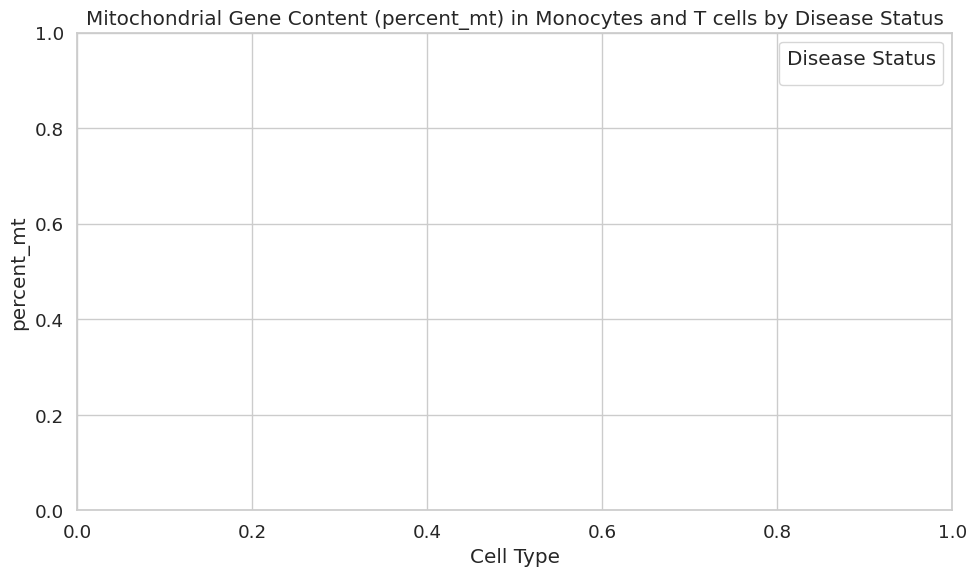

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract metadata from the anndata object
obs_df = adata.obs.copy()

# For this analysis, focus on monocytes and T cells
# Assuming cell_type_coarse 0 correspond to monocytes and 1 correspond to T cells
subset_df = obs_df[obs_df['cell_type_coarse'].isin([0, 1])]
subset_df['cell_type'] = subset_df['cell_type_coarse'].map({0: 'Monocytes', 1: 'T cells'})

# Plotting the distribution of mitochondrial gene percentages (percent_mt) by cell type and disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, x='cell_type', y='percent_mt', hue='Status')
plt.title('Mitochondrial Gene Content (percent_mt) in Monocytes and T cells by Disease Status')
plt.xlabel('Cell Type')
plt.ylabel('percent_mt')
plt.legend(title='Disease Status')
plt.tight_layout()
plt.show()

# Additionally, print summary statistics for percent_mt in each group
print(subset_df.groupby(['cell_type', 'Status'])['percent_mt'].describe())